### **Task 2 : Simple Linear Regression**
In this regression task we will predict the percentage of marks that a 
student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

**Importing Libraries**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Importing our dataset**

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [54]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Data Visualization**

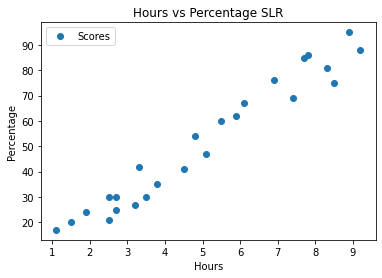

In [56]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage SLR')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

**Preparing the data**

In [57]:
X = df.iloc[:, :-1].values  #Hours
y = df.iloc[:, 1].values  #Scores

**Splitting the Data into training and tests sets**

In [58]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm**

In [59]:
from sklearn.linear_model import LinearRegression  
linear = LinearRegression()  
linear.fit(X_train, y_train) 

print("Regression Training Complete")

Regression Training Complete


**Interpreting Model Coefficient**

In [60]:
print(linear.intercept_)
print(linear.coef_)

2.018160041434662
[9.91065648]


**Regression Line**

In [61]:
line = linear.coef_*X+linear.intercept_

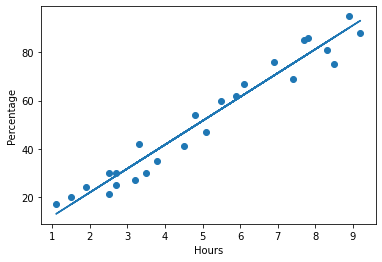

In [62]:
plt.scatter(X, y)
plt.xlabel('Hours')  
plt.ylabel('Percentage')
plt.plot(X, line);
plt.show()

In [63]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [64]:
y_pred = linear.predict(X_test)

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Accuracy Check**

In [66]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105354

**Predicting for our own input**

In [67]:
hours = 9.25
my_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Model Evaluation**

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
